In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


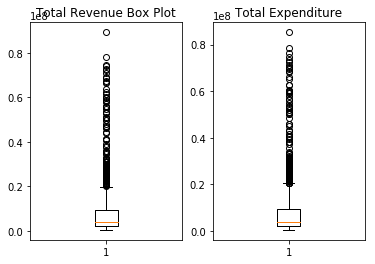

In [3]:
# Değişkenleri interpolasyon yaparak dolduralım ve aşırı değerleri box plot ile inceleyelim.

df.TOTAL_REVENUE = df.TOTAL_REVENUE.interpolate()
df.TOTAL_EXPENDITURE = df.TOTAL_EXPENDITURE.interpolate()
plt.subplot(1,2,1)
plt.boxplot(df.TOTAL_REVENUE)
plt.title('Total Revenue Box Plot')

plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE)
plt.title('Total Expenditure')
plt.show()

In [4]:
# Görüldüğü üzere her iki değişkende de bir çok aşırı değer yer almaktadır.

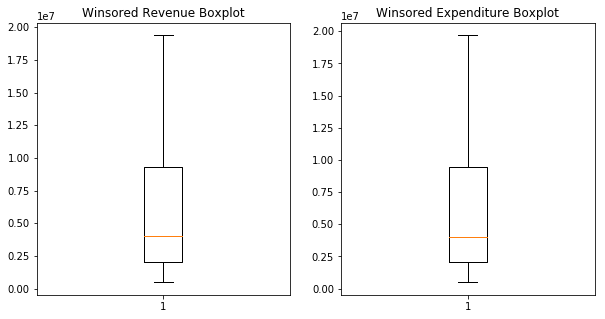

In [15]:
# Winsorize metodunu uygulayarak aşırı değerlerimizi sınırlandıralım.
from scipy.stats.mstats import winsorize
winsored_revenue = winsorize(df.TOTAL_REVENUE, (0,0.10))
winsored_expenditure = winsorize(df.TOTAL_EXPENDITURE, (0,0.10))
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(winsored_revenue)
plt.title('Winsored Revenue Boxplot')

plt.subplot(1,2,2)
plt.boxplot(winsored_expenditure)
plt.title('Winsored Expenditure Boxplot')
plt.show()


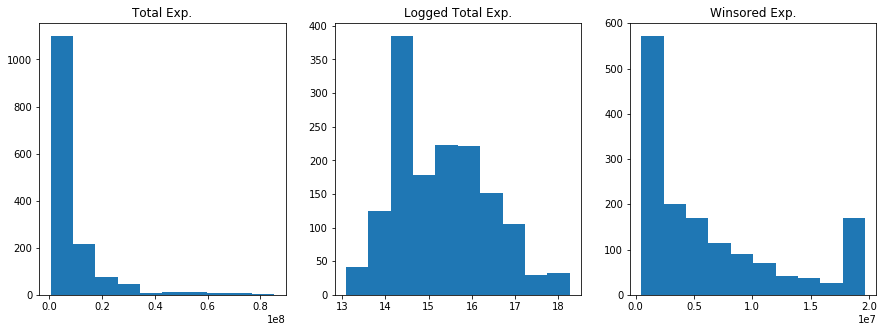

In [21]:
# Bu şekilde aşırı değerlerden kurtulduk. Log dönüşümü ile deneyelim. Kıyaslama yapalım.

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.hist(df.TOTAL_EXPENDITURE)
plt.title('Total Exp.')

plt.subplot(1,3,2)
plt.hist(np.log(df.TOTAL_EXPENDITURE))
plt.title('Logged Total Exp.')

plt.subplot(1,3,3)
plt.hist(winsored_expenditure)
plt.title('Winsored Exp.')
plt.show()

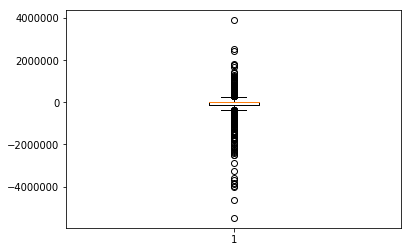

In [30]:
# Bütçe açığı oluşturalım ve aykırı değerlerine bakalım.

df['DEFICIT_OVER'] = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
plt.boxplot(df['DEFICIT_OVER'])
plt.show()

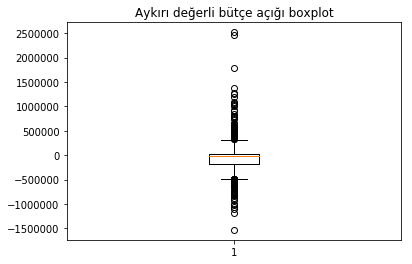

In [47]:
# Aykırı değerleri ayıkladıktan sonra bir bütçe açığı oluşturalım.

df['DEFICIT'] = winsored_revenue - winsored_expenditure
plt.boxplot(df['DEFICIT'])
plt.title('Aykırı değerli bütçe açığı boxplot')
plt.show()

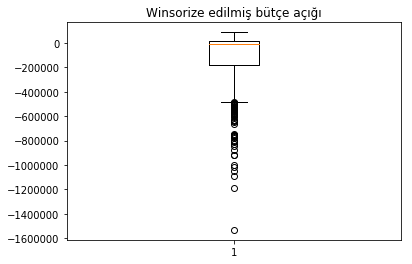

In [89]:
# Oluşturduğumuz bu bütçe açığını da aykırı değerlerden arındırmak için winsorize uygulayalım.

df['DEFICIT_WINSORED'] = winsorize(df['DEFICIT'],(0,0.15))
plt.boxplot(df['DEFICIT_WINSORED'])
plt.title('Winsorize edilmiş bütçe açığı')
plt.show()

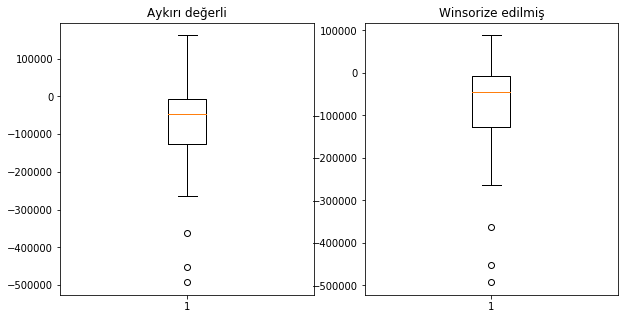

In [88]:

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(df[df['STATE']== 'ARKANSAS']['DEFICIT'])
plt.title('Aykırı değerli')

plt.subplot(1,2,2)
plt.boxplot(df[df['STATE']== 'ARKANSAS']['DEFICIT_WINSORED'])
plt.title('Winsorize edilmiş')
plt.show()

 6. Soru için yorum
Bütçe açığı bizim için çok önemli bir değişken olsaydı, toplam gelir ve giderlerdeki aşırı değerleri temizlemeden bir
bütçe açığı değişkeni oluştururduk. Aykırı değerler bizim için kritik öneme sahip olabilir. 

